### Modules

In [121]:
# general 
import psycopg2 as psyc
import pandas as pd
import numpy as np
import json
import datetime
from collections import Counter

# statistics 
from statsmodels.stats.weightstats import ttest_ind
from scipy.stats import ttest_rel, bartlett, levene

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### ETL

In [2]:
# saved database connection data as a hidden json file, for confidentiality 
with open("/Users/lucasramadan/SCL-Work/.db_conn.json", 'r') as f:
    db_conn = json.load(f)

In [3]:
# create the connection
# unpacking the arguments
conn = psyc.connect(**db_conn)

In [4]:
cur = conn.cursor()

In [6]:
# query to gather metrics 
with open('/Users/lucasramadan/SCL-Work/LA_Same-Day_Zip_Experiment/travel_time_metrics_array.sql') as f:
    q = f.read()

In [7]:
cur.execute(q)

In [8]:
data = cur.fetchall()

In [9]:
data = np.asarray(data)

In [11]:
cols = [col.name for col in cur.description]
cols

['visit_date', 'zone', 'vtt', 'ptt', 'pttpv', 'ttt']

In [12]:
# finally close the connection
conn.close()

In [13]:
df = pd.DataFrame(data[:, 1:], index=data[:, 0], columns=cols[1:])
df.fillna(value=0.0)
df.head()

,zone,vtt,ptt,pttpv,ttt
2016-09-26,LA-A,"[22.66583335, 18.2, 25.7400000016, 26.78833333...","[5.0, 35.5333333333, 5.0, 45.6724999984, 5.0, ...","[0.714285714286, 5.92222222222, 0.714285714286...","[23.3801190643, 24.1222222222, 26.4542857159, ..."
2016-09-27,LA-A,"[44.3974999984, 4.9, 21.0791666667, 40.4308333...","[5.0, 22.8075000167, 66.8941666842, 5.0, 37.17...","[0.714285714286, 3.80125000278, 6.68941666842,...","[45.1117857127, 8.70125000278, 27.7685833351, ..."
2016-09-28,LA-A,"[30.25, 43.1083333333, 18.8, 47.6833333333, 36...","[60.9866666675, 30.0, 28.4741666834, 33.404166...","[8.71238095249, 7.5, 3.16379629815, 8.35104166...","[38.9623809525, 50.6083333333, 21.9637962982, ..."
2016-09-29,LA-A,"[42.9099999984, 38.3908333341, 45.0, 57.884166...","[49.7383333325, 35.4724999984, 40.5016666651, ...","[5.52648148139, 5.91208333307, 8.10033333302, ...","[48.4364814798, 44.3029166672, 53.100333333, 5..."
2016-09-30,LA-A,"[35.2333333333, 97.225, 18.8125, 40.3833333333...","[45.0, 5.62333333492, 5.62333333492, 23.331666...","[11.25, 0.468611111244, 0.468611111244, 5.8329...","[46.4833333333, 97.6936111112, 19.2811111112, ..."


### Filtering and Segmentation

In [15]:
test_date = datetime.date(2016, 11, 10)

In [18]:
df = df[df.index < datetime.date.today()]

In [21]:
before = df.copy().drop('zone', axis=1)
before = before[before.index < test_date]
before.head()

,vtt,ptt,pttpv,ttt
2016-09-26,"[22.66583335, 18.2, 25.7400000016, 26.78833333...","[5.0, 35.5333333333, 5.0, 45.6724999984, 5.0, ...","[0.714285714286, 5.92222222222, 0.714285714286...","[23.3801190643, 24.1222222222, 26.4542857159, ..."
2016-09-27,"[44.3974999984, 4.9, 21.0791666667, 40.4308333...","[5.0, 22.8075000167, 66.8941666842, 5.0, 37.17...","[0.714285714286, 3.80125000278, 6.68941666842,...","[45.1117857127, 8.70125000278, 27.7685833351, ..."
2016-09-28,"[30.25, 43.1083333333, 18.8, 47.6833333333, 36...","[60.9866666675, 30.0, 28.4741666834, 33.404166...","[8.71238095249, 7.5, 3.16379629815, 8.35104166...","[38.9623809525, 50.6083333333, 21.9637962982, ..."
2016-09-29,"[42.9099999984, 38.3908333341, 45.0, 57.884166...","[49.7383333325, 35.4724999984, 40.5016666651, ...","[5.52648148139, 5.91208333307, 8.10033333302, ...","[48.4364814798, 44.3029166672, 53.100333333, 5..."
2016-09-30,"[35.2333333333, 97.225, 18.8125, 40.3833333333...","[45.0, 5.62333333492, 5.62333333492, 23.331666...","[11.25, 0.468611111244, 0.468611111244, 5.8329...","[46.4833333333, 97.6936111112, 19.2811111112, ..."


In [90]:
after = df[df.index >= test_date]
after = after[after['zone'] == 'LA-A']
after.drop('zone', axis=1, inplace=True)
after.head()

,vtt,ptt,pttpv,ttt
2016-11-10,"[47.8833333333, 41.1333333333, 22.7508333325, ...","[5.58083335161, 59.0174999992, 21.0, 46.168333...","[1.11616667032, 19.6724999997, 5.25, 23.084166...","[48.9995000037, 60.8058333331, 28.0008333325, ..."
2016-11-11,"[18.6708333333, 35.25, 48.05, 39.1833333333, 5...","[5.0, 5.58083335161, 68.7166666667, 45.0, 5.0,...","[2.5, 1.86027778387, 34.3583333333, 11.25, 2.5...","[21.1708333333, 37.1102777839, 82.4083333333, ..."
2016-11-12,"[18.4333333333, 10.4666666667, 21.2066666842, ...","[44.6525000175, 83.0, 5.0, 5.2125, 52.09000001...","[22.3262500087, 20.75, 1.66666666667, 5.2125, ...","[40.7595833421, 31.2166666667, 22.8733333508, ..."
2016-11-13,"[30.4666666667, 25.25, 29.3333333333, 22.66583...","[5.43916668495, 5.0, 40.0, 5.58083335161, 5.22...","[0.543916668495, 1.66666666667, 13.3333333333,...","[31.0105833352, 26.9166666667, 42.6666666667, ..."
2016-11-14,"[30.2875, 41.4366666675, 17.4833333333, 48.683...","[43.8450000008, 37.1016666651, 5.0, 5.43916668...","[43.8450000008, 12.3672222217, 0.5, 0.54391666...","[74.1325000008, 53.8038888892, 17.9833333333, ..."


In [88]:
before_samp = before.applymap(np.mean)
before_samp.head()

,vtt,ptt,pttpv,ttt
2016-09-26,31.985267,26.216300,5.996400,37.981666
2016-09-27,29.334549,31.442014,5.164576,34.499125
2016-09-28,30.534271,36.486840,8.809091,39.343362
2016-09-29,32.831927,40.161979,5.991039,38.822966
2016-09-30,32.781667,36.488816,5.443401,38.225067


In [91]:
after_samp = after.applymap(np.mean)
after_samp.head()

,vtt,ptt,pttpv,ttt
2016-11-10,37.455677,30.445833,16.290620,53.746297
2016-11-11,38.806500,25.451944,11.425013,50.231513
2016-11-12,36.287083,28.659167,8.762514,45.049597
2016-11-13,28.637396,13.247813,7.039688,35.677083
2016-11-14,43.135625,22.505903,10.435225,53.570850


### Aggregate Samples and Daily Sample Means

In [40]:
# without sample means, IE in aggregate
vtt = [reduce(lambda x,y: x+y, before['vtt'].values), reduce(lambda x,y: x+y, after['vtt'].values)]
ptt = [reduce(lambda x,y: x+y, before['ptt'].values), reduce(lambda x,y: x+y, after['ptt'].values)]
pttpv = [reduce(lambda x,y: x+y, before['pttpv'].values), reduce(lambda x,y: x+y, after['pttpv'].values)]
ttt = [reduce(lambda x,y: x+y, before['ttt'].values), reduce(lambda x,y: x+y, after['ttt'].values)]

In [92]:
# sample means, for normality 
vtt_samp = [before_samp['vtt'].values, after_samp['vtt'].values]
ptt_samp = [before_samp['ptt'].values, after_samp['ptt'].values]
pttpv_samp = [before_samp['pttpv'].values, after_samp['pttpv'].values]
ttt_samp = [before_samp['ttt'].values, after_samp['ttt'].values]

### Visit Travel Time

#### Aggregate

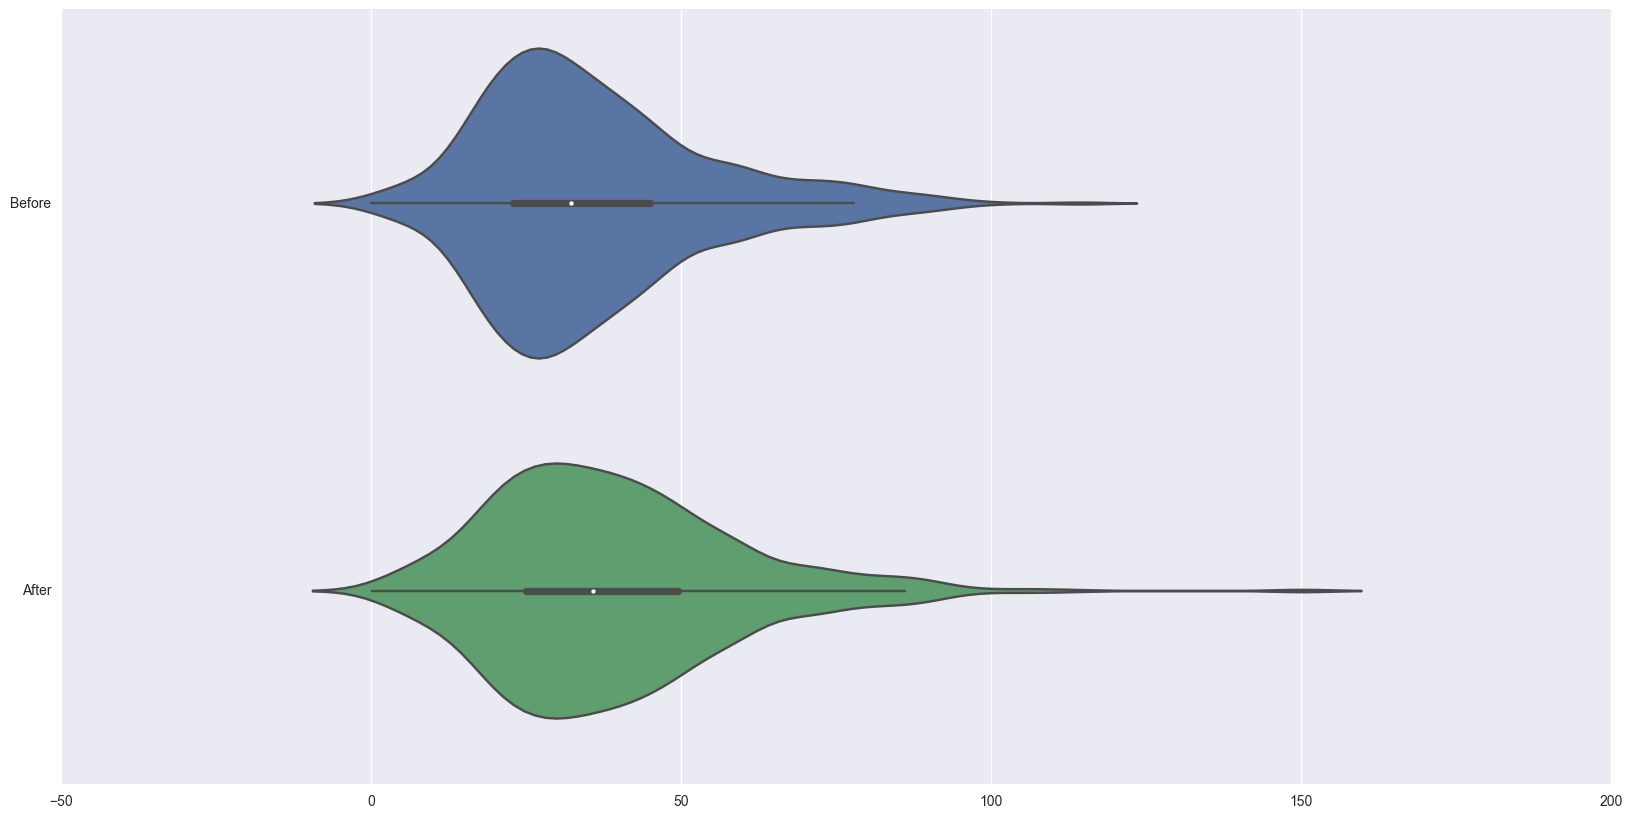

In [102]:
plt.figure(figsize=(20,10))
sns.violinplot(data=vtt, orient='h')
plt.yticks([0, 1], ['Before', 'After'])
plt.show();

#### Daily Sample means

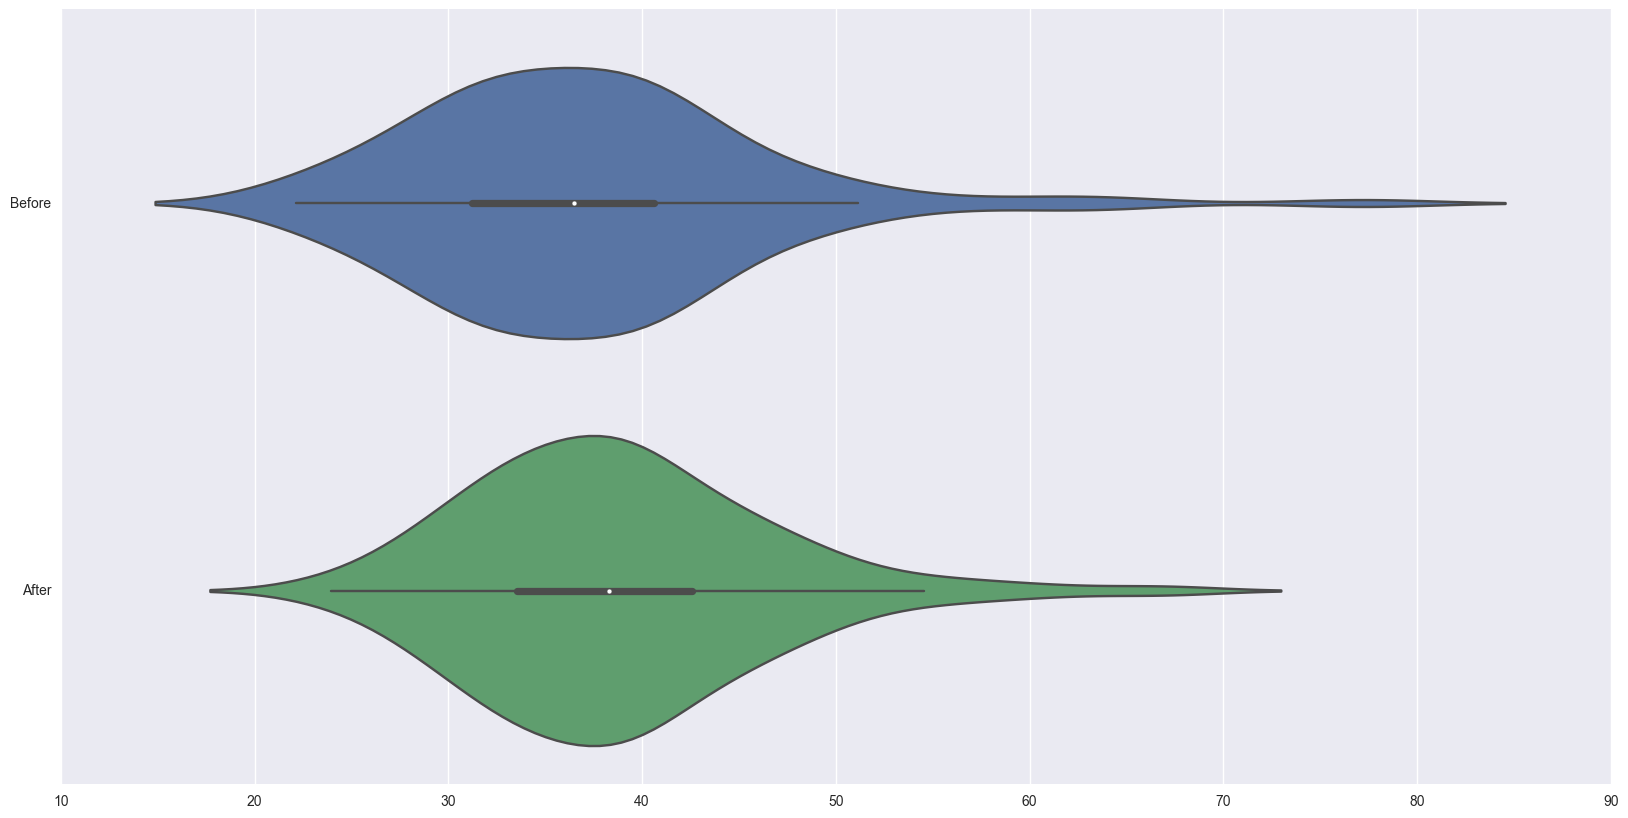

In [101]:
# ptt
plt.figure(figsize=(20,10))
plt.ylim([-20, 200])
sns.violinplot(data=vtt_samp, orient='h')
plt.yticks([0, 1], ['Before', 'After'])
plt.show();

### Pickup Travel Time

#### Aggregate

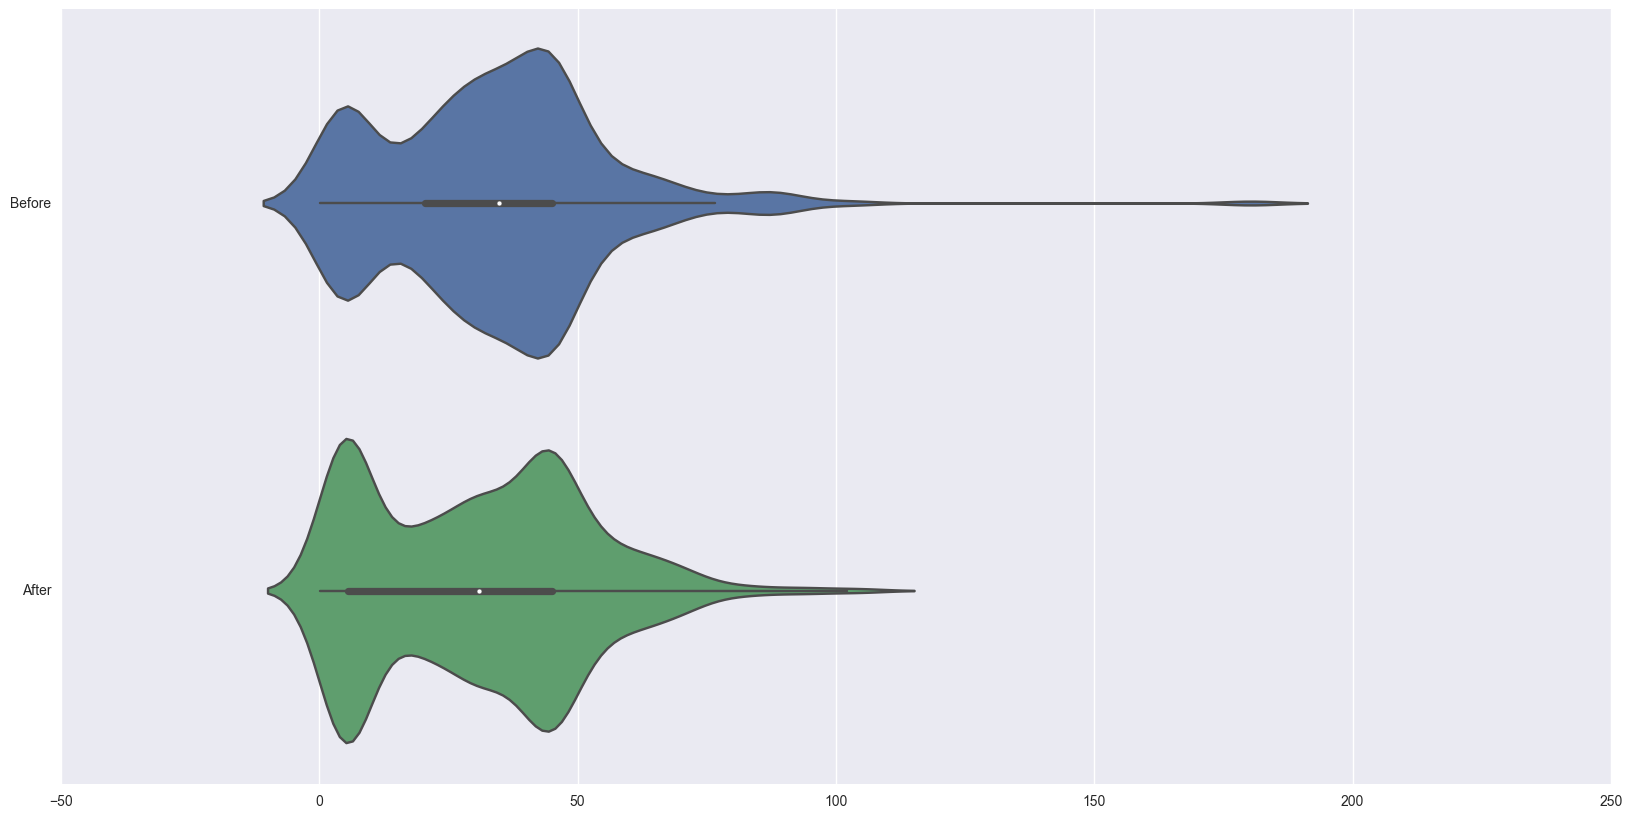

In [99]:
plt.figure(figsize=(20,10))
plt.ylim([-20, 200])
sns.violinplot(data=ptt, orient='h')
plt.yticks([0, 1], ['Before', 'After'])
plt.show();

#### Daily Sample Means

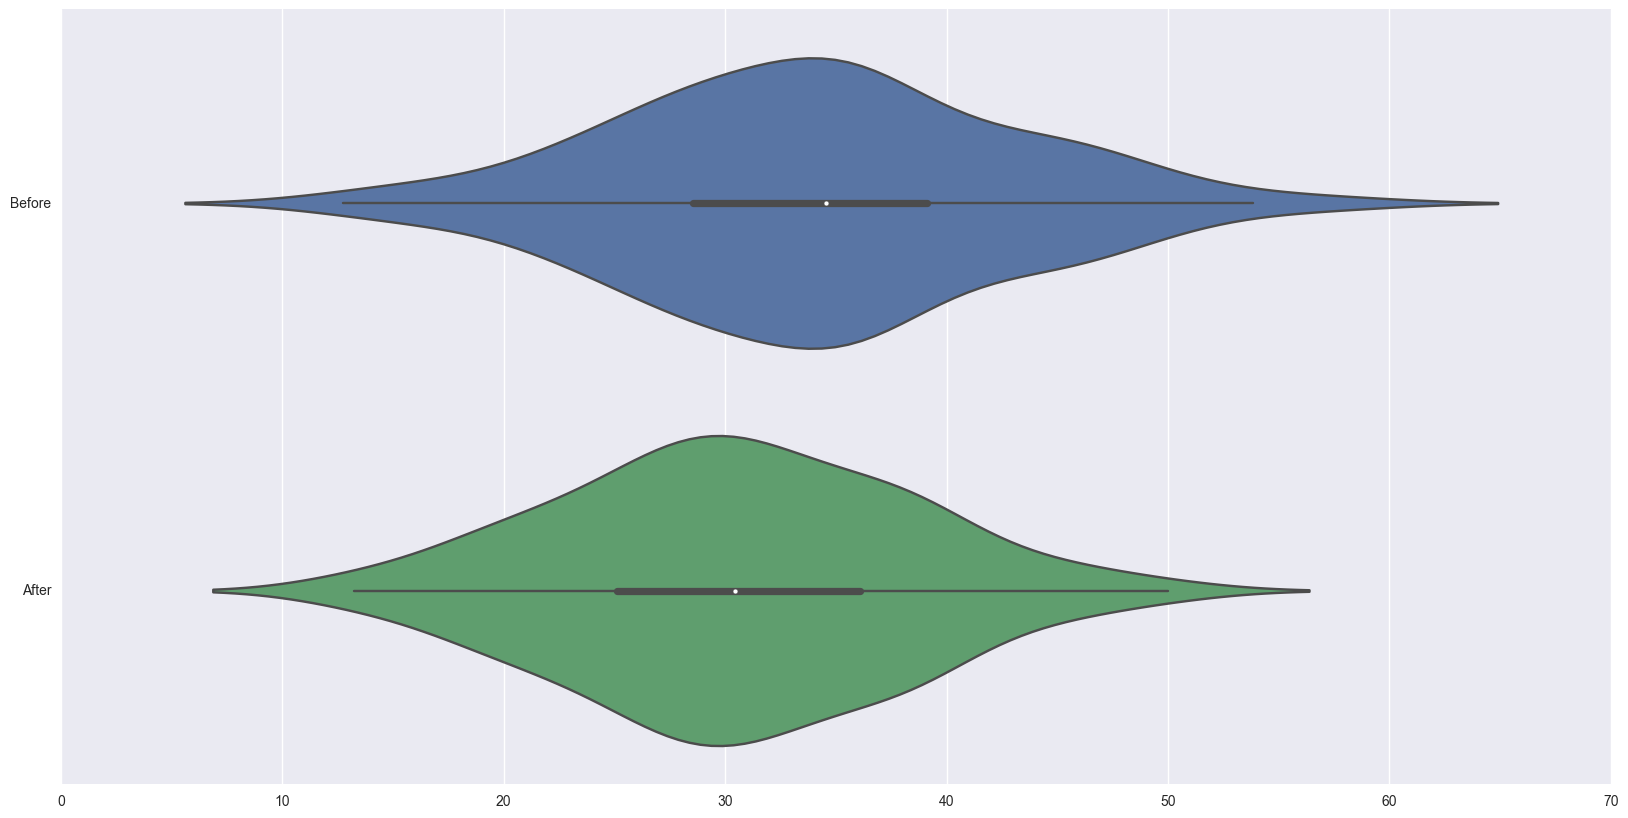

In [97]:
# ppt
plt.figure(figsize=(20,10))
plt.ylim([0, 100])
sns.violinplot(data=ptt_samp, orient='h')
plt.yticks([0, 1], ['Before', 'After'])
plt.show();

### Pickup Travel Time per Visit

#### Aggregate

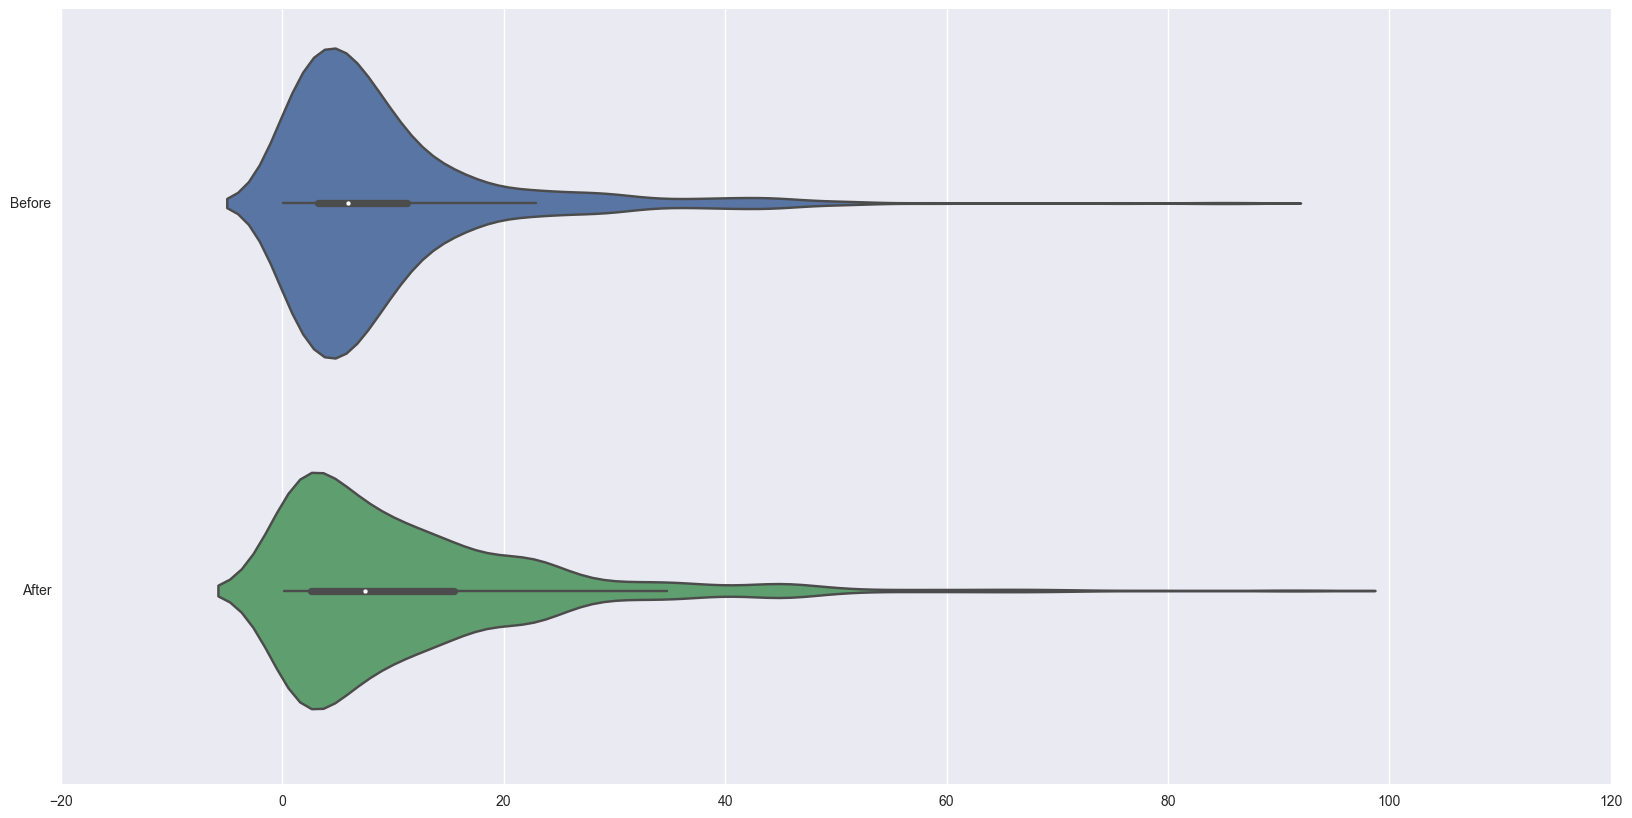

In [103]:
plt.figure(figsize=(20,10))
sns.violinplot(data=pttpv, orient='h')
plt.yticks([0, 1], ['Before', 'After'])
plt.show();

#### Daily Sample Means

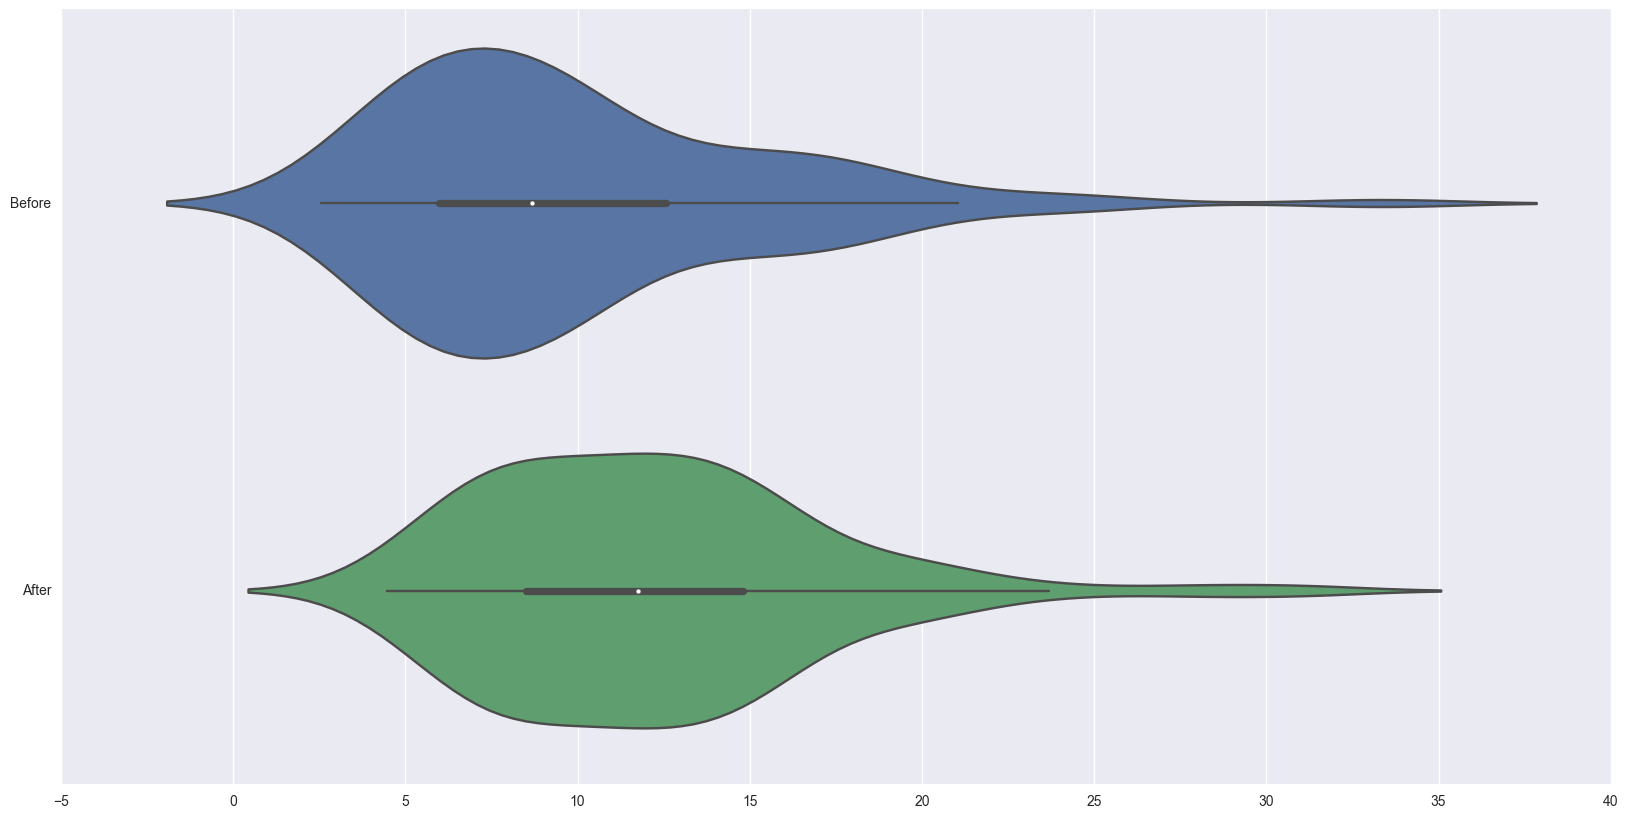

In [104]:
plt.figure(figsize=(20,10))
sns.violinplot(data=pttpv_samp, orient='h')
plt.yticks([0, 1], ['Before', 'After'])
plt.show();

### Total Travel Time

#### Aggregate

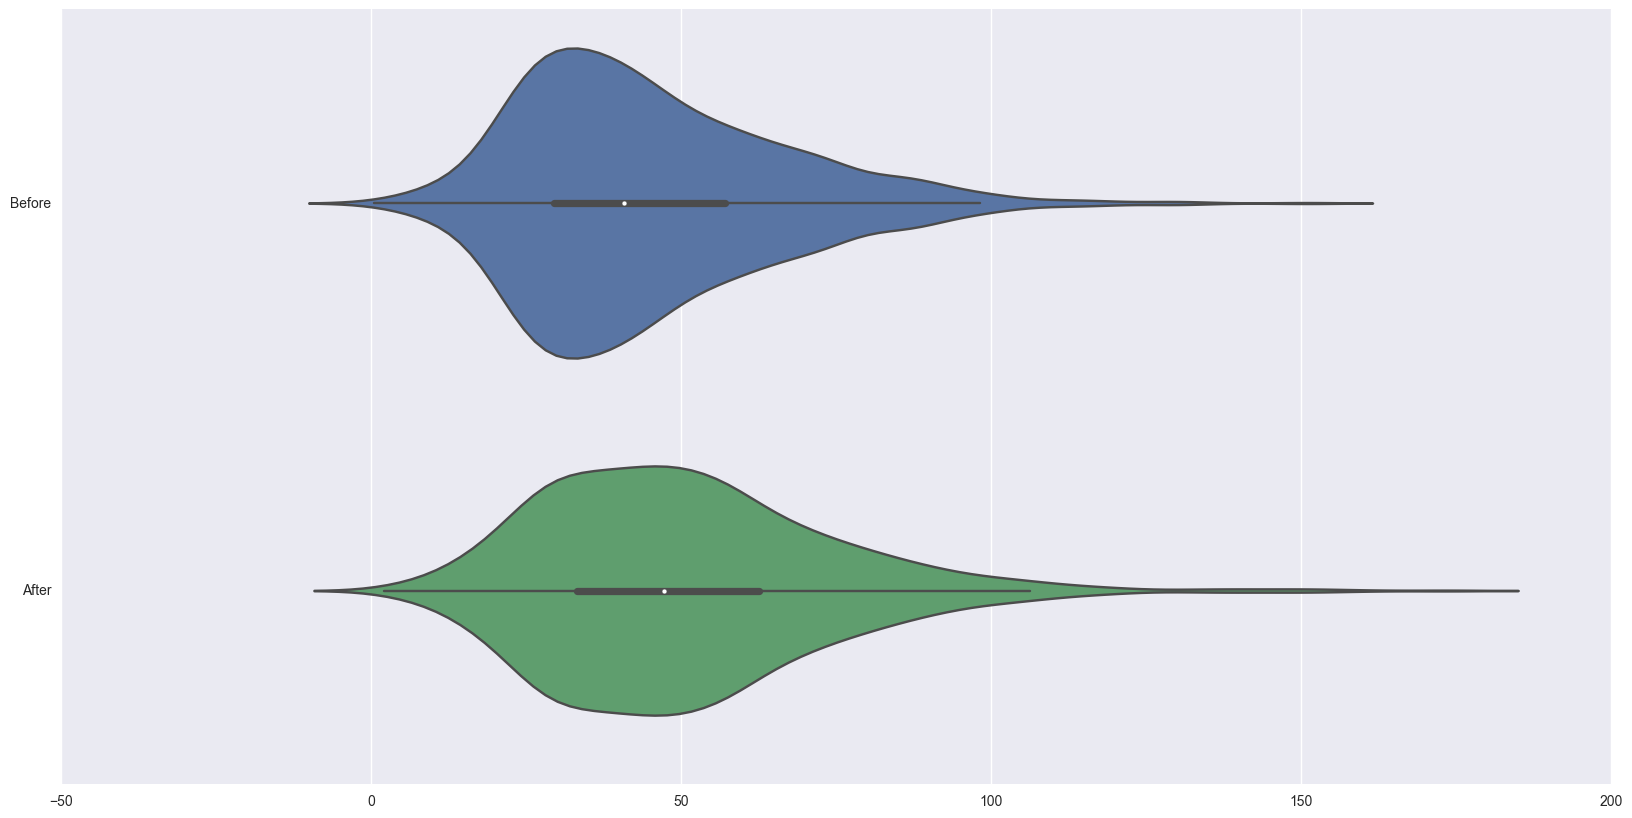

In [105]:
plt.figure(figsize=(20,10))
sns.violinplot(data=ttt, orient='h')
plt.yticks([0, 1], ['Before', 'After'])
plt.show();

#### Daily Sample Means

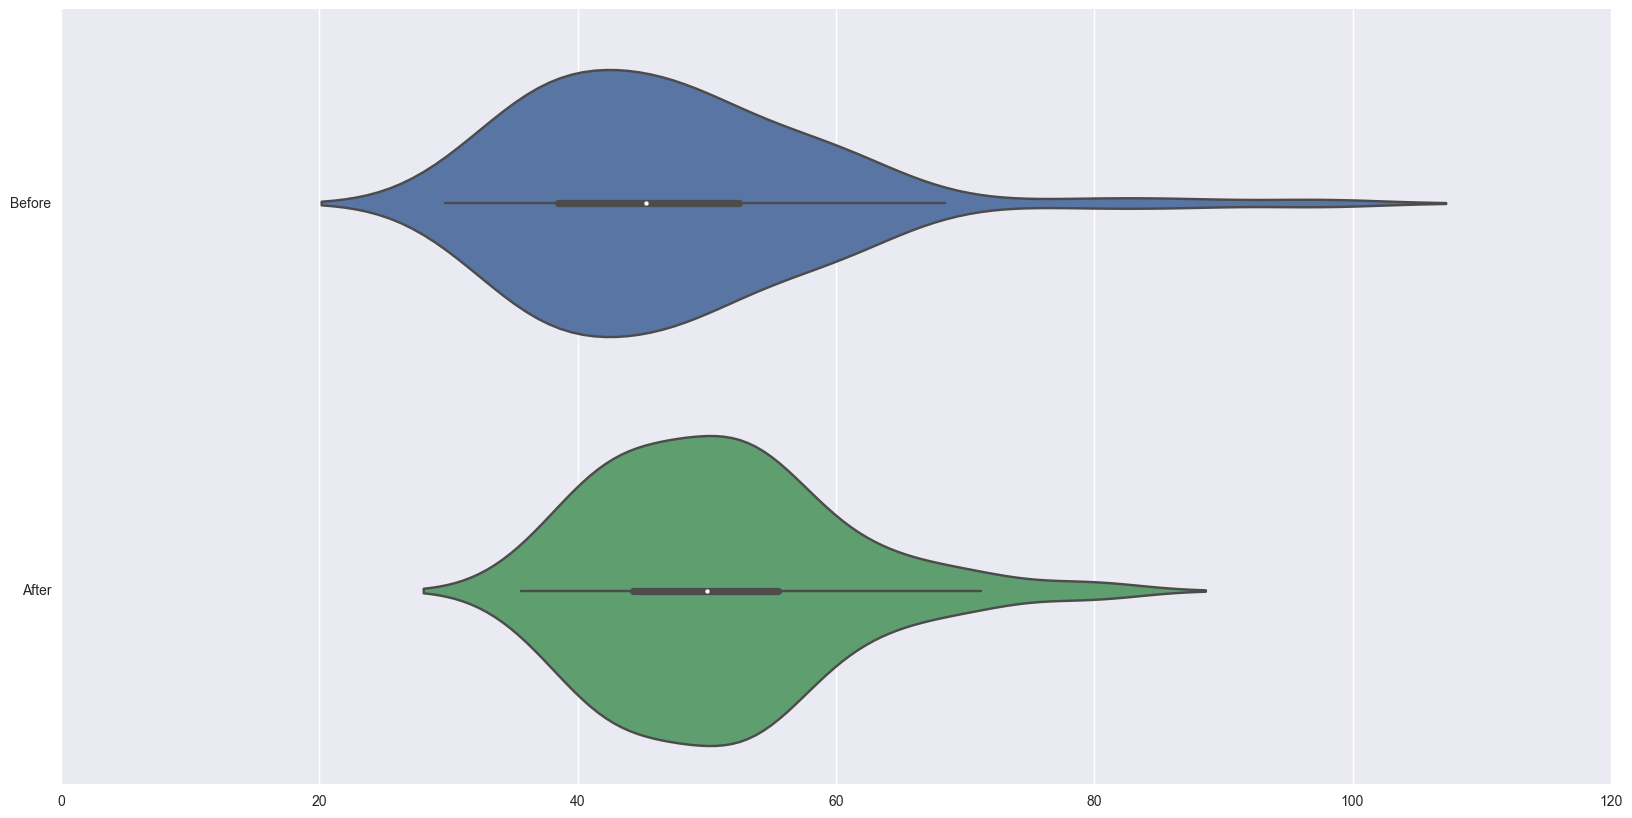

In [106]:
plt.figure(figsize=(20,10))
sns.violinplot(data=ttt_samp, orient='h')
plt.yticks([0, 1], ['Before', 'After'])
plt.show();

### Statistical Analysis

#### Aggregate, High Level

In [133]:
# high level summary
# before, after
# mean, median, stdev

print 'vtt'
print '-'*40
print 'means:', map(np.mean, vtt)
print 'medians:', map(np.median, vtt)
print 'stdevs:', map(np.std, vtt)
print '-'*40
print 'ptt'
print 'means:', map(np.mean, ptt)
print 'medians:', map(np.median, ptt)
print 'stdevs:', map(np.std, ptt)
print '-'*40
print 'pttpv'
print 'means:', map(np.mean, pttpv)
print 'medians:', map(np.median, pttpv)
print 'stdevs:', map(np.std, pttpv)
print '-'*40
print 'ttt'
print 'means:', map(np.mean, ttt)
print 'medians:', map(np.median, ttt)
print 'stdevs:', map(np.std, ttt)
print '-'*40

vtt
----------------------------------------
means: [35.967662370436436, 38.830526030784924]
medians: [32.271666665871898, 35.799999999999997]
stdevs: [18.432657512218555, 19.789520018971771]
----------------------------------------
ptt
means: [33.928900830174882, 30.83537544744091]
medians: [34.707500000794703, 31.0]
stdevs: [21.979682030662286, 21.048161437726474]
----------------------------------------
pttpv
means: [9.1569922584460617, 11.521776956086503]
medians: [5.9622222222222199, 7.5]
stdevs: [10.129027407461766, 12.387723409885469]
----------------------------------------
ttt
means: [45.124654628882503, 50.352302986871443]
medians: [40.841250008344701, 47.294166684150703]
stdevs: [21.212902992915716, 23.250427127357771]
----------------------------------------


In [114]:
summary = []

# always [before, after] for each metric

for metric in [vtt, ptt, pttpv, ttt]:
    
    # ie compare before (0) and after (1)
    stats = ttest_ind(metric[0], metric[1], usevar='unequal')
    
    summary.append(stats)

In [115]:
summary = pd.DataFrame(summary, index=['vtt', 'ptt', 'pttpv', 'ttt'], columns=['t-score', 'p-value', 'df'])
summary.head()

,t-score,p-value,df
vtt,-3.563854,3.730513e-04,2251.888369
ptt,3.407095,6.684903e-04,2181.877012
pttpv,-5.000285,6.163981e-07,2263.323861
ttt,-5.596357,2.454257e-08,2258.794555


#### Daily Sample Means

In [129]:
# high level summary
# before, after
print 'vtt:'
print map(np.mean, vtt_samp), map(np.median, vtt_samp), map(np.std, vtt_samp)
print 'ptt:'
print map(np.mean, ptt_samp), map(np.median, ptt_samp), map(np.std, ptt_samp)
print 'pttpv:'
print map(np.mean, pttpv_samp), map(np.median, pttpv_samp), map(np.std, pttpv_samp)
print 'ttt:'
print map(np.mean, ttt_samp), map(np.median, ttt_samp), map(np.std, ttt_samp)

vtt:
[37.188127561605164, 38.717274845012874] [36.503733975612207, 38.288148147971548] [8.918911652737826, 7.5615225050223307]
ptt:
[34.037886851786993, 30.464204147047482] [34.550033334334699, 30.445833336561918] [8.7286263867033309, 7.7559996699838596]
pttpv:
[9.9497665929107288, 12.137628138089879] [8.6659376583781818, 11.746657510325585] [5.4866817037787419, 4.8968669136764156]
ttt:
[47.137894154515898, 50.854902983102747] [45.327279289626915, 50.022784728093292] [11.753565516178737, 9.1913756619019988]


In [117]:
summary_samp = []

# always [before, after] for each metric

for metric in [vtt_samp, ptt_samp, pttpv_samp, ttt_samp]:
    
    # ie compare before (0) and after (1)
    stats = ttest_ind(metric[0], metric[1], usevar='unequal')
    
    summary_samp.append(stats)

In [118]:
summary_samp = pd.DataFrame(summary_samp, index=['vtt', 'ptt', 'pttpv', 'ttt'], columns=['t-score', 'p-value', 'df'])
summary_samp.head()

,t-score,p-value,df
vtt,-1.224835,0.222311,172.102081
ptt,2.865337,0.004680,173.787607
pttpv,-2.785170,0.005943,173.910415
ttt,-2.334766,0.020740,167.761079


#### Analysis of Variance

In [137]:
# checking for variances
var_summary = []

agg_data = [['vtt', vtt], ['ptt', ptt], ['pttpv', pttpv], ['ttt', ttt]]

var_cols = ['Bartlet Stat', 'Bartlet p', 'Levene Stat', 'Levene p']

for met_name, (before, after) in agg_data:
    
    # ie compare before (0) and after (1)
    b = bartlett(before, after)
    l = levene(before, after)
    
    var_summary.append([met_name, b.statistic, b.pvalue, l.statistic, l.pvalue])
    
var_summary = np.asarray(var_summary)
var_summary = pd.DataFrame(var_summary[:, 1:], index=var_summary[:, 0], columns=var_cols)
var_summary

,Bartlet Stat,Bartlet p,Levene Stat,Levene p
vtt,5.64765593305,0.0174787214452,4.42271406434,0.0355735020611
ptt,2.12371490174,0.14503438094,7.45674540048,0.00636881251053
pttpv,44.8569942435,2.11962398713e-11,35.2202191743,3.39699842238e-09
ttt,9.40500974736,0.00216393368348,5.72453859542,0.01681035265


In [138]:
# checking for variances
var_summary_samp = []

agg_data_samp = [['vtt', vtt_samp], ['ptt', ptt_samp], ['pttpv', pttpv_samp], ['ttt', ttt_samp]]

var_cols = ['Bartlet Stat', 'Bartlet p', 'Levene Stat', 'Levene p']

for met_name, (before, after) in agg_data_samp:
    
    # ie compare before (0) and after (1)
    b = bartlett(before, after)
    l = levene(before, after)
    
    var_summary_samp.append([met_name, b.statistic, b.pvalue, l.statistic, l.pvalue])
    
var_summary_samp = np.asarray(var_summary_samp)
var_summary_samp = pd.DataFrame(var_summary_samp[:, 1:], index=var_summary_samp[:, 0], columns=var_cols)
var_summary_samp

,Bartlet Stat,Bartlet p,Levene Stat,Levene p
vtt,2.35025582669,0.125262449124,0.847147618316,0.358627532863
ptt,1.20557793188,0.272209672843,0.6266374314,0.429663056178
pttpv,1.11729212682,0.290502277081,0.204999908665,0.65127579167
ttt,5.18421502631,0.0227929663182,1.92638275047,0.16691925863


In [120]:
# summary.to_csv('/Users/lucasramadan/SCL-Work/LA_Same-Day_Zip_Experiment/summary_stats.csv')